    After running multiple models looking at beer names, beer styles, and main styles, the decision to use main styles as a final model was based on the total number of users, ideal range of total clusters, and varied prediction responses. The final model is shown below

# Kmeans Clustering Model
### Using average user reviews per beer main styles

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from scipy.sparse import csr_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import pickle

import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
from scipy.sparse import csr_matrix

In [2]:
# Set seed
np.random.seed(1)

### Read data

In [3]:
styles= pd.read_csv('10K_filtered.csv')

In [4]:
styles.head()

,Unnamed: 0,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,main_style
0,0,10099,Dogfish Head Brewery,1266775164,4.0,4.5,4.5,DmanGTR,American Double / Imperial IPA,4.5,4.5,90 Minute IPA,9.0,2093,India Pale Ales
1,1,10099,Dogfish Head Brewery,1296628385,4.0,4.0,4.0,nickadams2,American Double / Imperial IPA,3.5,4.0,90 Minute IPA,9.0,2093,India Pale Ales
2,2,10099,Dogfish Head Brewery,1250389086,4.0,4.0,4.0,kegger22,American Double / Imperial IPA,4.0,4.5,90 Minute IPA,9.0,2093,India Pale Ales
3,3,10099,Dogfish Head Brewery,1230224468,5.0,5.0,5.0,fairway31533,American Double / Imperial IPA,5.0,5.0,90 Minute IPA,9.0,2093,India Pale Ales
4,4,10099,Dogfish Head Brewery,1229312994,4.0,4.5,4.0,Bung,American Double / Imperial IPA,4.0,4.0,90 Minute IPA,9.0,2093,India Pale Ales


In [5]:
styles[['beer_name', 'beer_style']].head()

,beer_name,beer_style
0,90 Minute IPA,American Double / Imperial IPA
1,90 Minute IPA,American Double / Imperial IPA
2,90 Minute IPA,American Double / Imperial IPA
3,90 Minute IPA,American Double / Imperial IPA
4,90 Minute IPA,American Double / Imperial IPA


## Preprocess Data

In [7]:
# Group by user and style for average reviews per style per user
user_group = styles.groupby(['review_profilename', 'main_style'])

In [8]:
# Transform to pivot table for use in model
style_pivot = pd.pivot_table(user_group.mean(), index=['review_profilename'], columns=['main_style'], values = 'review_overall')

In [9]:
# Preview to verify
style_pivot.head()

main_style,Bocks,Brown Ales,Dark Ales,Dark Lagers,Hybrid Beers,India Pale Ales,Pale Ales,Pilseners and Pale Lagers,Porters,Specialty Beers,Stouts,Strong Ales,Wheat Beers,Wild/Sour Beers
review_profilename,,,,,,,,,,,,,,
0110x011,4.0,4.5,4.75,NaN,4.0,4.33871,4.208333,4.0,4.2,4.5,3.921053,4.145833,4.5,4.431818
01Ryan10,NaN,NaN,NaN,NaN,NaN,5.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02maxima,NaN,NaN,NaN,NaN,NaN,4.50000,NaN,3.0,NaN,NaN,4.500000,4.000000,NaN,NaN
03SVTCobra,NaN,NaN,NaN,4.0,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,3.50000,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Create sparse matrix from pivot table
sparse_array = csr_matrix(pd.SparseDataFrame(style_pivot).to_coo())

### Silhouette Analysis

In [12]:
# Define function to calculate the clustering errors
def clustering_errors(k, data):
   model = KMeans(n_clusters=k).fit(data)
   predictions = model.predict(data)
   silhouette_avg = silhouette_score(data, predictions)
   return silhouette_avg

In [13]:
possible_k_values = range(2, 55)

# Calculate error values for all k values we're interested in
errors_per_k = [clustering_errors(k, sparse_array) for k in possible_k_values]

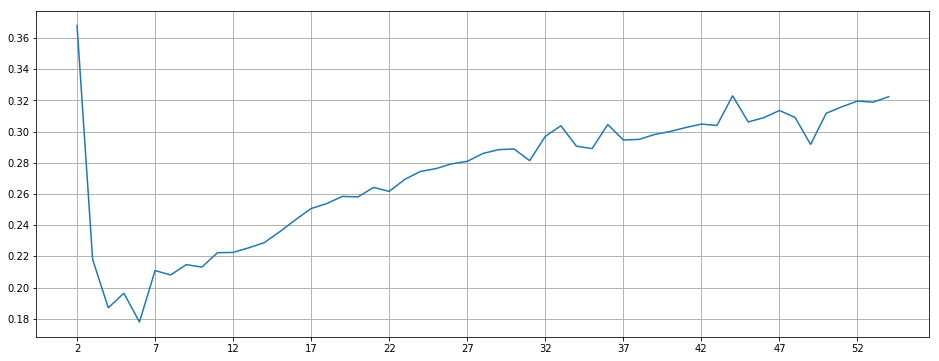

In [14]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(possible_k_values, errors_per_k)

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .02)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

# Kmeans Model

In [11]:
# Based on graph above, use 30 clusters for model
k = 30
model = KMeans(n_clusters=k).fit(sparse_array)
predictions = model.predict(sparse_array)

In [6]:
# Save model - load model
import joblib
# filename = 'stylesModel.sav'
# pickle.dump(model, open(filename, 'wb'))

model = pickle.load(open('stylesModel.sav', 'rb'))

In [12]:
# View predictions to verify if varied
pd.DataFrame(predictions)

,0
0,2
1,3
2,19
3,12
4,13
5,16
6,6
7,18
8,7
9,15


In [18]:
# Save predictions to csv
pd.DataFrame(predictions).to_csv('style_10k_clusterpredictions.csv')

#### Test Predictions
See if same cluster prediction or if varied

In [19]:
# Create test matrix
test = style_pivot.iloc[0:1]
test

main_style,Bocks,Brown Ales,Dark Ales,Dark Lagers,Hybrid Beers,India Pale Ales,Pale Ales,Pilseners and Pale Lagers,Porters,Specialty Beers,Stouts,Strong Ales,Wheat Beers,Wild/Sour Beers
review_profilename,,,,,,,,,,,,,,
0110x011,4.0,4.5,4.75,NaN,4.0,4.33871,4.208333,4.0,4.2,4.5,3.921053,4.145833,4.5,4.431818


In [20]:
# Fill all values as NaN
for style in list(test):
    test[style] = test['Dark Lagers']

C:\Users\lizma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
# Verify null matrix
test.isnull()

main_style,Bocks,Brown Ales,Dark Ales,Dark Lagers,Hybrid Beers,India Pale Ales,Pale Ales,Pilseners and Pale Lagers,Porters,Specialty Beers,Stouts,Strong Ales,Wheat Beers,Wild/Sour Beers
review_profilename,,,,,,,,,,,,,,
0110x011,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [22]:
# Save null matrix to csv
test.to_csv('emptyMatrix.csv')

In [23]:
# Fill multiple null matrices with different values for testing
test1 = test.copy()
test2 = test.copy()
test3 = test.copy()
test4 = test.copy()

test1['Pilseners and Pale Lagers'] = 5
test1['Wheat Beers'] = 4.5
test1['Brown Ales'] = 4

test2['Dark Ales'] = 4
test2['Bocks'] = 4.5
test2['India Pale Ales'] = 5

test3['Dark Ales'] = 5
test3['Wheat Beers'] = 4.5
test3['India Pale Ales'] = 4

test4['Dark Lagers'] = 5
test4['Specialty Beers'] = 4.5
test4['Wild/Sour Beers'] = 4

test4

main_style,Bocks,Brown Ales,Dark Ales,Dark Lagers,Hybrid Beers,India Pale Ales,Pale Ales,Pilseners and Pale Lagers,Porters,Specialty Beers,Stouts,Strong Ales,Wheat Beers,Wild/Sour Beers
review_profilename,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,4


In [24]:
# Check null values for a testing matrix
test4.isnull()

main_style,Bocks,Brown Ales,Dark Ales,Dark Lagers,Hybrid Beers,India Pale Ales,Pale Ales,Pilseners and Pale Lagers,Porters,Specialty Beers,Stouts,Strong Ales,Wheat Beers,Wild/Sour Beers
review_profilename,,,,,,,,,,,,,,
0110x011,True,True,True,False,True,True,True,True,True,False,True,True,True,False


In [25]:
# View dataframe to rid multindex
pd.DataFrame(test4.iloc[0]).transpose()

main_style,Bocks,Brown Ales,Dark Ales,Dark Lagers,Hybrid Beers,India Pale Ales,Pale Ales,Pilseners and Pale Lagers,Porters,Specialty Beers,Stouts,Strong Ales,Wheat Beers,Wild/Sour Beers
0110x011,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,4.0


In [26]:
# Create spares matrix for each test matrix - must use same form as used to create model to test
test_sparse_array1 = csr_matrix(pd.SparseDataFrame(pd.DataFrame(test1.iloc[0]).transpose()).to_coo())
test_sparse_array2 = csr_matrix(pd.SparseDataFrame(pd.DataFrame(test2.iloc[0]).transpose()).to_coo())
test_sparse_array3 = csr_matrix(pd.SparseDataFrame(pd.DataFrame(test3.iloc[0]).transpose()).to_coo())
test_sparse_array4 = csr_matrix(pd.SparseDataFrame(pd.DataFrame(test4.iloc[0]).transpose()).to_coo())

In [27]:
model.predict(test_sparse_array2)

array([3])

In [28]:
model.predict(test_sparse_array3)

array([23])

In [29]:
model.predict(test_sparse_array1)

array([7])

In [30]:
model.predict(test_sparse_array4)

array([12])

In [31]:
# View sparese matrix shape used to define model
sparse_array.shape

(32140, 14)

In [32]:
# View test sparese matrix shape
test_sparse_array4.shape

(1, 14)

##### Since each test matrix gives a different prediction, we conclude that the model is successful in clustering users based on average reviews for each beer style

## Silhouette Analysis - Clusters

In [33]:
# Function for silhouette plots for each cluster
def plotSilhouette(n_clusters, X):

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 15)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, 32140 + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
#     ax2.scatter(X[:, 0], X[:, 5], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the centers of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 30 The average silhouette_score is : 0.2978181417197682


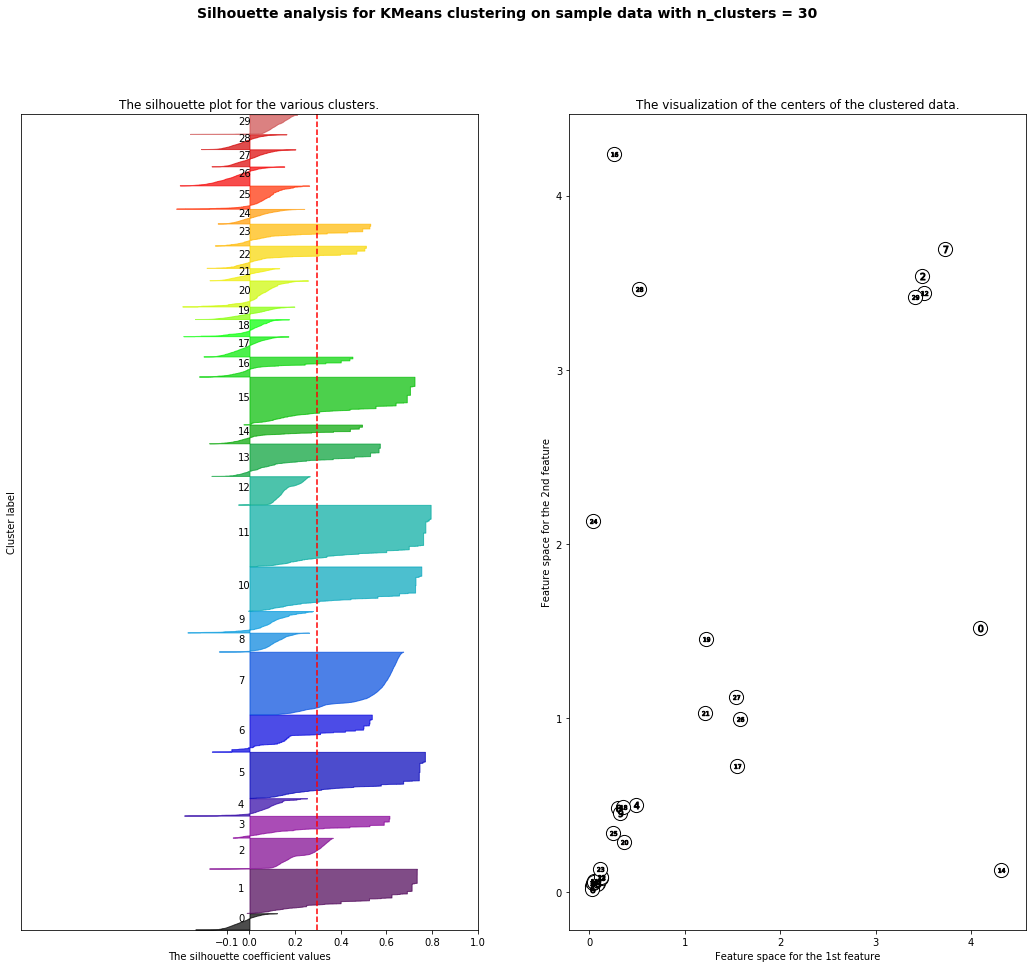

In [34]:
plotSilhouette(30, sparse_array)

In [35]:
# Function for silhouette plots without scatter centers
def plotSilhouetteOnly(n_clusters, X):

    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(9, 15)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, 32140 + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 30 The average silhouette_score is : 0.2978181417197682


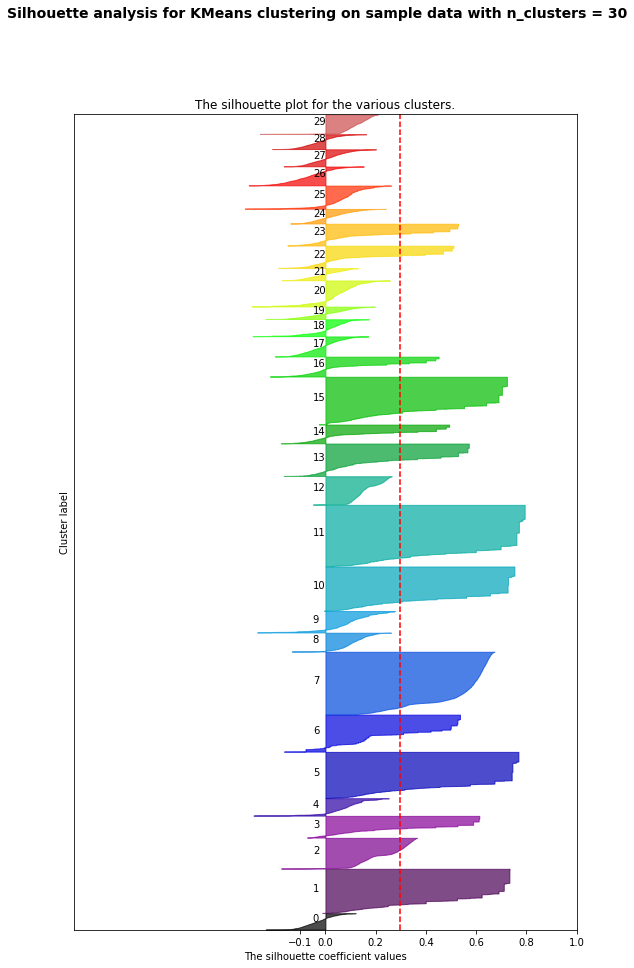

In [36]:
plotSilhouetteOnly(30, sparse_array)

## Test three beer choices

In [37]:
# Create beer choice list
beers = ['Gumballhead','Great Lakes Glockenspiel Weizenbock','Founders American Black Ale']

In [38]:
# Read null matrix and conversion matrix
base_df = pd.read_csv('emptyMatrix.csv', index_col ='review_profilename')
style_df = pd.read_csv('convertBeerToStyle.csv')

# Verify beer choice list
beers

['Gumballhead',
 'Great Lakes Glockenspiel Weizenbock',
 'Founders American Black Ale']

In [39]:
# Convert beer choices to styles
beers = [style_df[style_df['beer_name'] == beer]['main_style'].iloc[0] for beer in beers]
beers

['Wheat Beers', 'Bocks', 'Brown Ales']

In [40]:
# Assign scores based on beer choice list index
# If style is chosen multiple times, use first appearance location for score
if beers[0] == beers[1]:
    if beers[1] == beers[2]:
        base_df[beers[0]] = 5
    else:
        base_df[beers[0]] = 5
        base_df[beers[2]] = 4.5
elif beers[0] == beers[2]:
    base_df[beers[0]] = 5
    base_df[beers[1]] = 4.5
elif beers[1] == beers[2]:
    base_df[beers[0]] = 5
    base_df[beers[1]] = 4.5
else:
    base_df[beers[0]] = 5
    base_df[beers[1]] = 4.5
    base_df[beers[2]] = 4

In [41]:
# Convert to sparse matrix for use in the model
sparse_styles = csr_matrix(pd.SparseDataFrame(base_df).to_coo())

In [42]:
# Verify sparse matrix shape
sparse_styles.shape

(1, 14)

## Heatmaps

In [43]:
def draw_beers_heatmap(most_rated_beer_users_selection, axis_labels=True):
    
    fig = plt.figure(figsize=(7,15))
    ax = plt.gca()
    
    # Draw heatmap
    heatmap = ax.imshow(most_rated_beer_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')
    if axis_labels:
            ax.set_yticks(np.arange(most_rated_beer_users_selection.shape[0]) , minor=False)
            ax.set_xticks(np.arange(most_rated_beer_users_selection.shape[1]) , minor=False)
            ax.invert_yaxis()
            ax.xaxis.tick_top()
            labels = most_rated_beer_users_selection.columns.str[:40]
            ax.set_xticklabels(labels, minor=False)
            ax.set_yticklabels(most_rated_beer_users_selection.index, minor=False)
            plt.setp(ax.get_xticklabels(), rotation=90)
    else:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    ax.grid(False)
    ax.set_ylabel('User id')
    
    # Separate heatmap from color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    
    # Color bar
    cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
    cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])
    plt.show()

In [44]:
def get_most_rated_beers(user_beer_ratings, max_number_of_beers):
    # 1- Count
    user_beer_ratings = user_beer_ratings.append(user_beer_ratings.count(), ignore_index=True)
    # 2- sort
    user_beer_ratings_sorted = user_beer_ratings.sort_values(len(user_beer_ratings)-1, axis=1, ascending=False)
    user_beer_ratings_sorted = user_beer_ratings_sorted.drop(user_beer_ratings_sorted.tail(1).index)
    # 3- slice
    most_rated_beers = user_beer_ratings_sorted.iloc[:, :max_number_of_beers]
    return most_rated_beers


def get_most_rated_users(user_beer_ratings, max_number_of_users):
    # 1- Count
    user_beer_ratings = user_beer_ratings.append(user_beer_ratings.count(), ignore_index=True)
    # 2- sort
    user_beer_ratings_sorted = user_beer_ratings.sort_values(len(user_beer_ratings)-1, axis=1, ascending=False)
    user_beer_ratings_sorted = user_beer_ratings_sorted.drop(user_beer_ratings_sorted.tail(1).index)
    # 3- slice
    most_rated_beers = user_beer_ratings_sorted.iloc[:max_number_of_users, :]
    return most_rated_beers


# Define the sorting by rating function
def sort_by_rating_density(user_beer_ratings, n_beers, n_users):
    most_rated_beers = get_most_rated_beers(user_beer_ratings, n_beers)
    most_rated_beers = get_most_rated_beers(most_rated_beers, n_users)
    return most_rated_beers

In [45]:
hm_df = get_most_rated_beers(style_pivot, len(list(style_pivot)))

In [46]:
hm_df = get_most_rated_users(hm_df, 500)

In [47]:
hm_df = sort_by_rating_density(hm_df, len(list(hm_df)), 500)

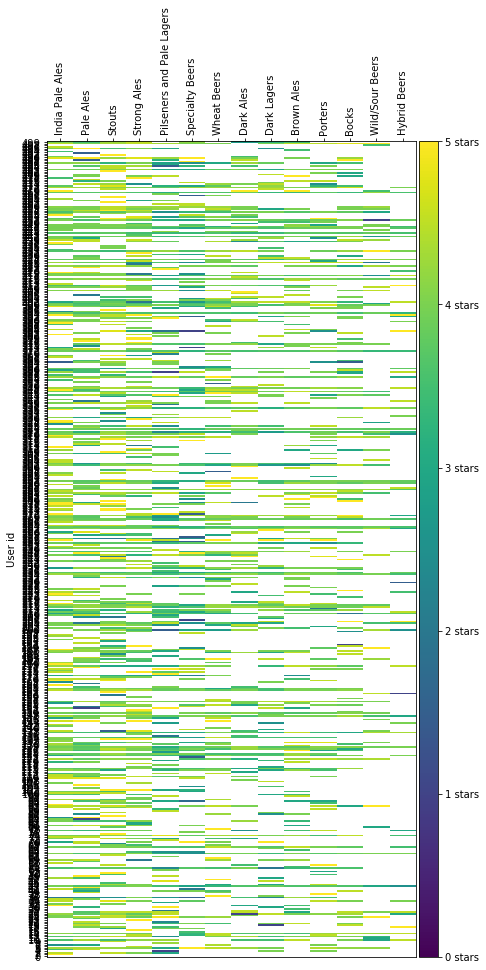

In [48]:
draw_beers_heatmap(hm_df) # 1000 users

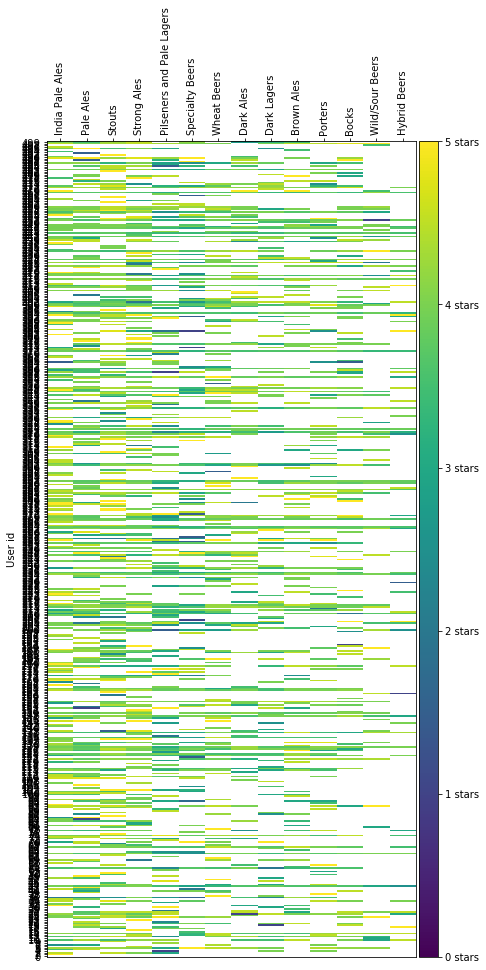

In [49]:
draw_beers_heatmap(hm_df)

## Create matrices to be used to convert data
- Empty matrix to use to fill beer choices in app
- Conversion matrix to convert beer names to beer styles

In [50]:
# Group by beer name
tester = styles.groupby('beer_name')
len(tester.last())

9768

In [51]:
# Save conversion matrix
pd.DataFrame(tester.last())[['main_style']].to_csv('convertBeerToStyle.csv')

In [52]:
# Save null matrix
test.to_csv('emptyMatrix.csv')

## Data for use in app
Create csvs to use for cluster averages, beer lists, and summaries

In [13]:
list(styles)

['Unnamed: 0',
 'brewery_id',
 'brewery_name',
 'review_time',
 'review_overall',
 'review_aroma',
 'review_appearance',
 'review_profilename',
 'beer_style',
 'review_palate',
 'review_taste',
 'beer_name',
 'beer_abv',
 'beer_beerid',
 'main_style']

In [14]:
# Create prediction matrix from usernames and cluster prediction
predict_df = pd.DataFrame({'review_profilename':style_pivot.index , 'cluster':predictions})
predict_df = predict_df.set_index('review_profilename')
predict_df.head()

,cluster
review_profilename,
0110x011,2
01Ryan10,3
02maxima,19
03SVTCobra,12
04101Brewer,13


In [15]:
main_df = styles.copy()

In [16]:
# Merge predictions to main dataframe on username
main_df = main_df.merge(predict_df, how='left', on='review_profilename')
main_df = main_df.drop('Unnamed: 0', axis=1)

### Mean reviews overall

In [17]:
# Create groups to determine overall beer name, style, and cluster mean ratings
style_groups = main_df.groupby('main_style')
beer_groups = main_df.groupby('beer_name')
cluster_groups = main_df.groupby('cluster')

In [18]:
# Overall style mean df
style_averages_df = style_groups.mean()[['review_overall', 'review_appearance', 'review_palate', 'review_taste', 'review_aroma']]

In [19]:
# Overall beer mean df
beer_averages_df = beer_groups.mean()[['review_overall', 'review_appearance', 'review_palate', 'review_taste', 'review_aroma']]

In [20]:
# Overall cluster mean df
cluster_average_df = cluster_groups.mean()[['review_overall', 'review_appearance', 'review_palate', 'review_taste', 'review_aroma']]

In [21]:
# Add total reviews to each mean df
style_averages_df['overall_total_styles'] = style_groups.count()['review_overall']
beer_averages_df['overall_total_beers'] = beer_groups.count()['review_overall']
cluster_average_df['overall_total_groups'] = cluster_groups.count()['review_overall']

In [22]:
# View to verify
style_averages_df.head()

,review_overall,review_appearance,review_palate,review_taste,review_aroma,overall_total_styles
main_style,,,,,,
Bocks,3.857913,3.870549,3.829540,3.888945,3.788234,50610
Brown Ales,3.827921,3.823933,3.686711,3.777357,3.677284,48899
Dark Ales,3.830322,3.947337,3.780306,3.839513,3.798334,60821
Dark Lagers,3.733352,3.714772,3.570152,3.611301,3.480492,60925
Hybrid Beers,3.778447,3.777306,3.705515,3.694485,3.600602,15775


In [23]:
# Verify length
len(style_averages_df)

14

In [24]:
# Rename colummns
style_averages_df = style_averages_df.rename(columns={'review_overall':'review_overall_per_style', 'review_appearance':'review_appearance_per_style', 'review_palate':'review_palate_per_style', 'review_taste':'review_taste_per_style', 'review_aroma':'review_aroma_per_style'})
beer_averages_df = beer_averages_df.rename(columns={'review_overall':'review_overall_per_beer', 'review_appearance':'review_appearance_per_beer', 'review_palate':'review_palate_per_beer', 'review_taste':'review_taste_per_beer', 'review_aroma':'review_aroma_per_beer'})
cluster_average_df = cluster_average_df.rename(columns={'review_overall':'review_overall_per_group', 'review_appearance':'review_appearance_per_group', 'review_palate':'review_palate_per_group', 'review_taste':'review_taste_per_group', 'review_aroma':'review_aroma_per_group'})

In [25]:
# View to verify
beer_averages_df.head()

,review_overall_per_beer,review_appearance_per_beer,review_palate_per_beer,review_taste_per_beer,review_aroma_per_beer,overall_total_beers
beer_name,,,,,,
"""400"" Ale",3.333333,3.916667,3.750000,3.444444,3.833333,18
"""Hop Obama"" Ale",4.160714,4.071429,3.982143,4.160714,3.910714,28
"""Old Yeltsin"" Imperial Stout",3.881818,4.045455,4.009091,4.109091,4.090909,55
"""Shabadoo"" Black & Tan Ale",3.991453,3.893162,3.846154,3.901709,3.717949,117
"""The Wind Cried Mari..."" Scottish Heather Ale",3.920000,3.900000,3.880000,4.020000,4.160000,25


In [26]:
# Cluster review groups
cluster_review_totals_per_style_per_beer = main_df.groupby(['cluster','main_style','beer_name']).count()
cluster_review_totals = main_df.groupby(['cluster']).count()

# Beer_style totals
cluster_total_beer_styles_per_main = main_df.groupby(['cluster', 'main_style', 'beer_style', 'beer_name']).last().reset_index().groupby(['cluster', 'main_style', 'beer_style', 'beer_name']).count()

In [27]:
# Merge mean average dfs to main df
main_df = main_df.merge(style_averages_df, how='left', on='main_style')
main_df = main_df.merge(beer_averages_df, how='left', on='beer_name')
main_df = main_df.merge(cluster_average_df, how='left', on='cluster')

In [28]:
# View to verify
main_df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,...,review_palate_per_beer,review_taste_per_beer,review_aroma_per_beer,overall_total_beers,review_overall_per_group,review_appearance_per_group,review_palate_per_group,review_taste_per_group,review_aroma_per_group,overall_total_groups
0,10099,Dogfish Head Brewery,1266775164,4.0,4.5,4.5,DmanGTR,American Double / Imperial IPA,4.5,4.5,...,4.181763,4.325988,4.213526,3290,3.823184,3.860905,3.763117,3.800105,3.759333,976340.0
1,10099,Dogfish Head Brewery,1296628385,4.0,4.0,4.0,nickadams2,American Double / Imperial IPA,3.5,4.0,...,4.181763,4.325988,4.213526,3290,3.920232,3.937697,3.856228,3.929103,3.864275,74065.0
2,10099,Dogfish Head Brewery,1250389086,4.0,4.0,4.0,kegger22,American Double / Imperial IPA,4.0,4.5,...,4.181763,4.325988,4.213526,3290,3.823184,3.860905,3.763117,3.800105,3.759333,976340.0
3,10099,Dogfish Head Brewery,1230224468,5.0,5.0,5.0,fairway31533,American Double / Imperial IPA,5.0,5.0,...,4.181763,4.325988,4.213526,3290,4.136544,4.085472,4.002646,4.152421,4.060730,3779.0
4,10099,Dogfish Head Brewery,1229312994,4.0,4.5,4.0,Bung,American Double / Imperial IPA,4.0,4.0,...,4.181763,4.325988,4.213526,3290,3.823184,3.860905,3.763117,3.800105,3.759333,976340.0


In [29]:
# Round mean reviews
main_df['review_overall_per_style'] = round(main_df['review_overall_per_style'], 2)
main_df['review_appearance_per_style'] = round(main_df['review_appearance_per_style'], 2)
main_df['review_palate_per_style'] = round(main_df['review_palate_per_style'], 2)
main_df['review_taste_per_style'] = round(main_df['review_taste_per_style'], 2)
main_df['review_aroma_per_style'] = round(main_df['review_aroma_per_style'], 2)
main_df['review_overall_per_beer'] = round(main_df['review_overall_per_beer'], 2)
main_df['review_appearance_per_beer'] = round(main_df['review_appearance_per_beer'], 2)
main_df['review_palate_per_beer'] = round(main_df['review_palate_per_beer'], 2)
main_df['review_taste_per_beer'] = round(main_df['review_taste_per_beer'], 2)
main_df['review_aroma_per_beer'] = round(main_df['review_aroma_per_beer'], 2)
main_df['review_overall_per_group'] = round(main_df['review_overall_per_group'], 2)
main_df['review_appearance_per_group'] = round(main_df['review_appearance_per_group'], 2)
main_df['review_palate_per_group'] = round(main_df['review_palate_per_group'], 2)
main_df['review_taste_per_group'] = round(main_df['review_taste_per_group'], 2)
main_df['review_aroma_per_group'] = round(main_df['review_aroma_per_group'], 2)
main_df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,...,review_palate_per_beer,review_taste_per_beer,review_aroma_per_beer,overall_total_beers,review_overall_per_group,review_appearance_per_group,review_palate_per_group,review_taste_per_group,review_aroma_per_group,overall_total_groups
0,10099,Dogfish Head Brewery,1266775164,4.0,4.5,4.5,DmanGTR,American Double / Imperial IPA,4.5,4.5,...,4.18,4.33,4.21,3290,3.82,3.86,3.76,3.80,3.76,976340.0
1,10099,Dogfish Head Brewery,1296628385,4.0,4.0,4.0,nickadams2,American Double / Imperial IPA,3.5,4.0,...,4.18,4.33,4.21,3290,3.92,3.94,3.86,3.93,3.86,74065.0
2,10099,Dogfish Head Brewery,1250389086,4.0,4.0,4.0,kegger22,American Double / Imperial IPA,4.0,4.5,...,4.18,4.33,4.21,3290,3.82,3.86,3.76,3.80,3.76,976340.0
3,10099,Dogfish Head Brewery,1230224468,5.0,5.0,5.0,fairway31533,American Double / Imperial IPA,5.0,5.0,...,4.18,4.33,4.21,3290,4.14,4.09,4.00,4.15,4.06,3779.0
4,10099,Dogfish Head Brewery,1229312994,4.0,4.5,4.0,Bung,American Double / Imperial IPA,4.0,4.0,...,4.18,4.33,4.21,3290,3.82,3.86,3.76,3.80,3.76,976340.0


In [35]:
main_df = main_df.merge(cluster_total_beer_styles_per_main[['brewery_id']].reset_index().rename(columns={'brewery_id':'cluster_total_beer_styles_per_main'}) , how='left', on=['cluster','main_style','beer_style','beer_name'])

In [36]:
main_df = main_df.merge(cluster_review_totals_per_style_per_beer[['brewery_id']].reset_index().rename(columns={'brewery_id':'cluster_review_totals_per_style_per_beer'}) , how='left', on=['cluster','main_style','beer_name'])

In [37]:
main_df = main_df.merge(cluster_review_totals[['brewery_id']].reset_index().rename(columns={'brewery_id':'cluster_review_totals'}) , how='left', on=['cluster'])

In [38]:
list(main_df)

['brewery_id',
 'brewery_name',
 'review_time',
 'review_overall',
 'review_aroma',
 'review_appearance',
 'review_profilename',
 'beer_style',
 'review_palate',
 'review_taste',
 'beer_name',
 'beer_abv',
 'beer_beerid',
 'main_style',
 'cluster',
 'review_overall_per_style',
 'review_appearance_per_style',
 'review_palate_per_style',
 'review_taste_per_style',
 'review_aroma_per_style',
 'overall_total_styles',
 'review_overall_per_beer',
 'review_appearance_per_beer',
 'review_palate_per_beer',
 'review_taste_per_beer',
 'review_aroma_per_beer',
 'overall_total_beers',
 'review_overall_per_group',
 'review_appearance_per_group',
 'review_palate_per_group',
 'review_taste_per_group',
 'review_aroma_per_group',
 'overall_total_groups',
 'cluster_total_beer_styles_per_main',
 'cluster_review_totals_per_style_per_beer',
 'cluster_review_totals']

### Mean cluster reviews

In [39]:
# Cluster beer group
cluster_beer_group = main_df.groupby(['cluster', 'beer_name'])

In [40]:
# Cluster style group
cluster_style_group = main_df.groupby(['cluster', 'main_style'])

In [41]:
# Cluster beer per style group
cluster_beer_style_group = main_df.groupby(['cluster', 'main_style', 'beer_name'])

In [42]:
# Mean cluster beer df
cluster_beers_df = cluster_beer_group.mean()[['review_overall', 'review_appearance', 'review_palate', 'review_taste', 'review_aroma']]

In [43]:
# Round mean values
cluster_beers_df['review_overall'] = round(cluster_beers_df['review_overall'], 2)
cluster_beers_df['review_aroma'] = round(cluster_beers_df['review_aroma'], 2)
cluster_beers_df['review_appearance'] = round(cluster_beers_df['review_appearance'], 2)
cluster_beers_df['review_palate'] = round(cluster_beers_df['review_palate'], 2)
cluster_beers_df['review_taste'] = round(cluster_beers_df['review_taste'], 2)

In [44]:
# Rename columns
cluster_beers_df = cluster_beers_df.rename(columns={'review_overall':'cluster_review_overall_group_beer', 'review_appearance':'cluster_review_appearance_group_beer', 'review_taste':'cluster_review_taste_group_beer', 'review_aroma':'cluster_review_aroma_group_beer', 'review_palate':'cluster_review_palate_group_beer'})

In [45]:
# Mean cluster style df
cluster_style_df = cluster_style_group.mean()[['review_overall', 'review_appearance', 'review_palate', 'review_taste', 'review_aroma']]

In [46]:
# Round mean values
cluster_style_df['review_overall'] = round(cluster_style_df['review_overall'], 2)
cluster_style_df['review_aroma'] = round(cluster_style_df['review_aroma'], 2)
cluster_style_df['review_appearance'] = round(cluster_style_df['review_appearance'], 2)
cluster_style_df['review_palate'] = round(cluster_style_df['review_palate'], 2)
cluster_style_df['review_taste'] = round(cluster_style_df['review_taste'], 2)

In [47]:
# Rename columns
cluster_style_df = cluster_style_df.rename(columns={'review_overall':'cluster_review_overall_group_style', 'review_appearance':'cluster_review_appearance_group_style', 'review_taste':'cluster_review_taste_group_style', 'review_aroma':'cluster_review_aroma_group_style', 'review_palate':'cluster_review_palate_group_style'})

In [48]:
# Mean cluster beer per style df
cluster_styles_beers_df = cluster_beer_style_group.mean()[['review_overall', 'review_appearance', 'review_palate', 'review_taste', 'review_aroma']]

In [49]:
# Round mean values
cluster_styles_beers_df['review_overall'] = round(cluster_styles_beers_df['review_overall'], 2)
cluster_styles_beers_df['review_aroma'] = round(cluster_styles_beers_df['review_aroma'], 2)
cluster_styles_beers_df['review_appearance'] = round(cluster_styles_beers_df['review_appearance'], 2)
cluster_styles_beers_df['review_palate'] = round(cluster_styles_beers_df['review_palate'], 2)
cluster_styles_beers_df['review_taste'] = round(cluster_styles_beers_df['review_taste'], 2)

In [50]:
# Rename columns
cluster_styles_beers_df = cluster_styles_beers_df.rename(columns={'review_overall':'cluster_review_overall_group_beer_per_style', 'review_appearance':'cluster_review_appearance_group_beer_per_style', 'review_taste':'cluster_review_aroma_group_beer_per_style', 'review_aroma':'cluster_review_aroma_group_beer_per_style', 'review_palate':'cluster_review_palate_group_beer_per_style'})

In [51]:
cluster_style_df.count()[['cluster_review_overall_group_style']].head()

cluster_review_overall_group_style    420
dtype: int64

In [52]:
cluster_beers_df['cluster_total_per_beer'] = cluster_beer_group.count()['review_overall']

In [53]:
cluster_style_df['cluster_total_per_style'] = cluster_style_group.count()['review_overall']

In [54]:
cluster_styles_beers_df['cluster_total_per_beer_per_style'] = cluster_beer_style_group.count()['review_overall']

In [55]:
# Merge main df with mean cluster beer df
main_df = main_df.merge(cluster_beers_df, how='left', on=['cluster','beer_name'])

In [56]:
# Merge main df with mean cluster style df
main_df = main_df.merge(cluster_style_df, how='left', on=['cluster','main_style'])

In [57]:
# Merge main df with mean cluster beer per style df
main_df = main_df.merge(cluster_styles_beers_df, how='left', on=['cluster','main_style','beer_name'])

In [58]:
# View to verify
main_df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,...,cluster_review_palate_group_style,cluster_review_taste_group_style,cluster_review_aroma_group_style,cluster_total_per_style,cluster_review_overall_group_beer_per_style,cluster_review_appearance_group_beer_per_style,cluster_review_palate_group_beer_per_style,cluster_review_aroma_group_beer_per_style,cluster_review_aroma_group_beer_per_style,cluster_total_per_beer_per_style
0,10099,Dogfish Head Brewery,1266775164,4.0,4.5,4.5,DmanGTR,American Double / Imperial IPA,4.5,4.5,...,3.91,3.95,3.95,139558.0,4.12,4.18,4.16,4.27,4.19,1539.0
1,10099,Dogfish Head Brewery,1296628385,4.0,4.0,4.0,nickadams2,American Double / Imperial IPA,3.5,4.0,...,3.97,4.04,4.02,13651.0,4.09,4.15,4.12,4.28,4.17,249.0
2,10099,Dogfish Head Brewery,1250389086,4.0,4.0,4.0,kegger22,American Double / Imperial IPA,4.0,4.5,...,3.91,3.95,3.95,139558.0,4.12,4.18,4.16,4.27,4.19,1539.0
3,10099,Dogfish Head Brewery,1230224468,5.0,5.0,5.0,fairway31533,American Double / Imperial IPA,5.0,5.0,...,4.15,4.33,4.23,3073.0,4.38,4.39,4.34,4.56,4.43,98.0
4,10099,Dogfish Head Brewery,1229312994,4.0,4.5,4.0,Bung,American Double / Imperial IPA,4.0,4.0,...,3.91,3.95,3.95,139558.0,4.12,4.18,4.16,4.27,4.19,1539.0


In [59]:
list(main_df)

['brewery_id',
 'brewery_name',
 'review_time',
 'review_overall',
 'review_aroma',
 'review_appearance',
 'review_profilename',
 'beer_style',
 'review_palate',
 'review_taste',
 'beer_name',
 'beer_abv',
 'beer_beerid',
 'main_style',
 'cluster',
 'review_overall_per_style',
 'review_appearance_per_style',
 'review_palate_per_style',
 'review_taste_per_style',
 'review_aroma_per_style',
 'overall_total_styles',
 'review_overall_per_beer',
 'review_appearance_per_beer',
 'review_palate_per_beer',
 'review_taste_per_beer',
 'review_aroma_per_beer',
 'overall_total_beers',
 'review_overall_per_group',
 'review_appearance_per_group',
 'review_palate_per_group',
 'review_taste_per_group',
 'review_aroma_per_group',
 'overall_total_groups',
 'cluster_total_beer_styles_per_main',
 'cluster_review_totals_per_style_per_beer',
 'cluster_review_totals',
 'cluster_review_overall_group_beer',
 'cluster_review_appearance_group_beer',
 'cluster_review_palate_group_beer',
 'cluster_review_taste_grou

In [60]:
# Save to csv
main_df.to_csv('mean_cluster_data.csv')

In [61]:
total_main_styles = main_df.groupby(['main_style','beer_name']).last()[['review_overall']]

In [62]:
total_beer_styles = main_df.groupby(['main_style','beer_style', 'beer_name']).last()[['review_overall']]

In [63]:
total_main_styles.head()

review_overall
main_style beer_name                                                     
Bocks      10 Degrees Below                                           4.0
           1888 Bock                                                  4.0
           1906 Reserva Especial                                      4.5
           30th Anniversary- Charlie, Fred And Ken's Bock             2.0
           Aass Bock                                                  4.0

In [64]:
total_main_styles = total_main_styles.reset_index()
total_beer_styles = total_beer_styles.reset_index()

total_main_styles = total_main_styles.groupby(['main_style']).count()
total_beer_styles = total_beer_styles.groupby(['main_style','beer_style']).count()

total_beer_styles.head()

beer_name  review_overall
main_style beer_style                                      
Bocks      Bock                          90              90
           Doppelbock                   129             129
           Eisbock                       15              15
           Maibock / Helles Bock         71              71
           Weizenbock                    56              56

In [65]:
total_main_styles.head()

,beer_name,review_overall
main_style,,
Bocks,350,350
Brown Ales,444,444
Dark Ales,430,430
Dark Lagers,504,504
Hybrid Beers,145,145


In [66]:
total_main_styles = total_main_styles.rename(columns={'beer_name':'main_style_total_beers'})
total_beer_styles = total_beer_styles.rename(columns={'beer_name':'beer_style_total_beers'})

total_main_styles = total_main_styles.drop('review_overall', axis=1)
total_beer_styles = total_beer_styles.drop('review_overall', axis=1)

In [67]:
main_df = main_df.merge(total_main_styles, how='left', on=['main_style'])
main_df = main_df.merge(total_beer_styles, how='left', on=['main_style', 'beer_style'])

In [68]:
main_df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,...,cluster_review_aroma_group_style,cluster_total_per_style,cluster_review_overall_group_beer_per_style,cluster_review_appearance_group_beer_per_style,cluster_review_palate_group_beer_per_style,cluster_review_aroma_group_beer_per_style,cluster_review_aroma_group_beer_per_style,cluster_total_per_beer_per_style,main_style_total_beers,beer_style_total_beers
0,10099,Dogfish Head Brewery,1266775164,4.0,4.5,4.5,DmanGTR,American Double / Imperial IPA,4.5,4.5,...,3.95,139558.0,4.12,4.18,4.16,4.27,4.19,1539.0,964,320
1,10099,Dogfish Head Brewery,1296628385,4.0,4.0,4.0,nickadams2,American Double / Imperial IPA,3.5,4.0,...,4.02,13651.0,4.09,4.15,4.12,4.28,4.17,249.0,964,320
2,10099,Dogfish Head Brewery,1250389086,4.0,4.0,4.0,kegger22,American Double / Imperial IPA,4.0,4.5,...,3.95,139558.0,4.12,4.18,4.16,4.27,4.19,1539.0,964,320
3,10099,Dogfish Head Brewery,1230224468,5.0,5.0,5.0,fairway31533,American Double / Imperial IPA,5.0,5.0,...,4.23,3073.0,4.38,4.39,4.34,4.56,4.43,98.0,964,320
4,10099,Dogfish Head Brewery,1229312994,4.0,4.5,4.0,Bung,American Double / Imperial IPA,4.0,4.0,...,3.95,139558.0,4.12,4.18,4.16,4.27,4.19,1539.0,964,320


In [69]:
list(main_df)

['brewery_id',
 'brewery_name',
 'review_time',
 'review_overall',
 'review_aroma',
 'review_appearance',
 'review_profilename',
 'beer_style',
 'review_palate',
 'review_taste',
 'beer_name',
 'beer_abv',
 'beer_beerid',
 'main_style',
 'cluster',
 'review_overall_per_style',
 'review_appearance_per_style',
 'review_palate_per_style',
 'review_taste_per_style',
 'review_aroma_per_style',
 'overall_total_styles',
 'review_overall_per_beer',
 'review_appearance_per_beer',
 'review_palate_per_beer',
 'review_taste_per_beer',
 'review_aroma_per_beer',
 'overall_total_beers',
 'review_overall_per_group',
 'review_appearance_per_group',
 'review_palate_per_group',
 'review_taste_per_group',
 'review_aroma_per_group',
 'overall_total_groups',
 'cluster_total_beer_styles_per_main',
 'cluster_review_totals_per_style_per_beer',
 'cluster_review_totals',
 'cluster_review_overall_group_beer',
 'cluster_review_appearance_group_beer',
 'cluster_review_palate_group_beer',
 'cluster_review_taste_grou

In [70]:
# Save to csv
main_df.drop(['brewery_id', 
 'review_time',
 'review_overall',
 'review_aroma',
 'review_appearance',
 'review_profilename',
 'review_palate',
 'review_taste',
 'beer_beerid'], axis=1).to_csv('mean_cluster_data.csv')

### Top 100 Beers per Cluster

In [71]:
topBeers_gr = main_df.groupby(['cluster', 'beer_name'])

In [72]:
topBeers_df = topBeers_gr.last()

In [73]:
topBeers_df.head()

brewery_id  \
cluster beer_name                                                   
0.0     "The Wind Cried Mari..." Scottish Heather Ale          14   
        #9                                                     96   
        (512) IPA                                           17863   
        10th Anniversary Double India Pale Ale                103   
        110K+OT Batch #3 - The Other West Coast IPA         17981   

                                                                        brewery_name  \
cluster beer_name                                                                      
0.0     "The Wind Cried Mari..." Scottish Heather Ale      Cambridge Brewing Company   
        #9                                                 Magic Hat Brewing Company   
        (512) IPA                                              (512) Brewing Company   
        10th Anniversary Double India Pale Ale         Middle Ages Brewing Co., Ltd.   
        110K+OT Batch #3 - The Other West Coast IPA               Cigar City Brewing   

                                                       review_time  \
cluster beer_name                                                    
0.0     "The Wind Cried Mari..." Scottish Heather Ale   1096481072   
        #9                                              1191178933   
        (512) IPA                                       1290881558   
        10th Anniversary Double India Pale Ale          1176527740   
        110K+OT Batch #3 - The Other West Coast IPA     1281145191   

                                                       review_overall  \
cluster beer_name                                                       
0.0     "The Wind Cried Mari..." Scottish Heather Ale             3.5   
        #9                                                        1.5   
        (512) IPA                                                 5.0   
        10th Anniversary Double India Pale Ale                    3.5   
        110K+OT Batch #3 - The Other West Coast IPA               3.0   

                                                       review_aroma  \
cluster beer_name                                                     
0.0     "The Wind Cried Mari..." Scottish Heather Ale           4.5   
        #9                                                      1.0   
        (512) IPA                                               5.0   
        10th Anniversary Double India Pale Ale                  4.0   
        110K+OT Batch #3 - The Other West Coast IPA             3.0   

                                                       review_appearance  \
cluster beer_name                                                          
0.0     "The Wind Cried Mari..." Scottish Heather Ale                4.5   
        #9                                                           4.0   
        (512) IPA                                                    4.0   
        10th Anniversary Double India Pale Ale                       3.0   
        110K+OT Batch #3 - The Other West Coast IPA                  4.0   

                                                      review_profilename  \
cluster beer_name                                                          
0.0     "The Wind Cried Mari..." Scottish Heather Ale          brewhiker   
        #9                                                        waldon   
        (512) IPA                                                 rgf001   
        10th Anniversary Double India Pale Ale                   bcgantz   
        110K+OT Batch #3 - The Other West Coast IPA               tfield   

                                                                                beer_style  \
cluster beer_name                                                                            
0.0     "The Wind Cried Mari..." Scottish Heather Ale  Scottish Gruit / Ancient Herbed Ale   
        #9                                                          Fruit / Vegetable Beer   
        (51

In [74]:
list(topBeers_df)

['brewery_id',
 'brewery_name',
 'review_time',
 'review_overall',
 'review_aroma',
 'review_appearance',
 'review_profilename',
 'beer_style',
 'review_palate',
 'review_taste',
 'beer_abv',
 'beer_beerid',
 'main_style',
 'review_overall_per_style',
 'review_appearance_per_style',
 'review_palate_per_style',
 'review_taste_per_style',
 'review_aroma_per_style',
 'overall_total_styles',
 'review_overall_per_beer',
 'review_appearance_per_beer',
 'review_palate_per_beer',
 'review_taste_per_beer',
 'review_aroma_per_beer',
 'overall_total_beers',
 'review_overall_per_group',
 'review_appearance_per_group',
 'review_palate_per_group',
 'review_taste_per_group',
 'review_aroma_per_group',
 'overall_total_groups',
 'cluster_total_beer_styles_per_main',
 'cluster_review_totals_per_style_per_beer',
 'cluster_review_totals',
 'cluster_review_overall_group_beer',
 'cluster_review_appearance_group_beer',
 'cluster_review_palate_group_beer',
 'cluster_review_taste_group_beer',
 'cluster_review_

In [75]:
topBeers_df = topBeers_df.sort_values(['cluster_review_overall_group_beer','cluster_total_per_beer','cluster_review_appearance_group_beer','cluster_review_palate_group_beer','cluster_review_taste_group_beer','cluster_review_aroma_group_beer', 'beer_abv'], ascending=False)

In [76]:
topBeers_df = topBeers_df.reset_index()

In [77]:
topBeers_df

,cluster,beer_name,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,...,cluster_review_aroma_group_style,cluster_total_per_style,cluster_review_overall_group_beer_per_style,cluster_review_appearance_group_beer_per_style,cluster_review_palate_group_beer_per_style,cluster_review_aroma_group_beer_per_style,cluster_review_aroma_group_beer_per_style,cluster_total_per_beer_per_style,main_style_total_beers,beer_style_total_beers
0,0.0,Heady Topper,27039,The Alchemist,1323291514,5.0,5.0,5.0,nrs207,American Double / Imperial IPA,...,4.12,1333.0,5.0,4.42,4.58,5.00,5.00,6.0,964,320
1,4.0,Bitter Brewer,13014,Surly Brewing Company,1295580522,5.0,5.0,4.0,Vittorio,English Bitter,...,3.89,2072.0,5.0,4.17,4.33,4.75,4.58,6.0,2227,125
2,6.0,Otter Head,2965,Otter Brewery Ltd,1164586778,5.0,5.0,5.0,bwl0808,English Strong Ale,...,4.21,2228.0,5.0,4.70,4.80,5.00,4.70,5.0,1027,41
3,0.0,Pliny The Younger,863,Russian River Brewing Company,1300578063,5.0,4.5,5.0,werdnacross,American Double / Imperial IPA,...,4.12,1333.0,5.0,4.88,5.00,5.00,4.75,4.0,964,320
4,28.0,The Abyss,63,Deschutes Brewery,1238639537,5.0,4.5,5.0,danmecum,American Double / Imperial Stout,...,3.97,345.0,5.0,4.88,5.00,5.00,4.62,4.0,806,225
5,22.0,Vanilla Bean Aged Dark Lord,26,Three Floyds Brewing Co. & Brewpub,1284089492,5.0,5.0,4.5,udchemist,Russian Imperial Stout,...,4.12,1515.0,5.0,4.88,4.88,5.00,5.00,4.0,806,201
6,3.0,Arctic Panzer Wolf,26,Three Floyds Brewing Co. & Brewpub,1318855596,5.0,5.0,5.0,paultierney1,American Double / Imperial IPA,...,4.23,3073.0,5.0,4.88,4.75,4.62,4.75,4.0,964,320
7,29.0,St. Nikolaus Bock Bier,125,Pennsylvania Brewing Company,1290263002,5.0,4.0,5.0,StretchZep,Bock,...,4.04,787.0,5.0,4.75,4.75,4.88,4.50,4.0,350,90
8,15.0,Rare D.O.S.,22147,Peg's Cantina & Brewpub / Cycle Brewing,1306722312,5.0,5.0,4.5,olenka82,American Double / Imperial Stout,...,4.22,2007.0,5.0,4.50,5.00,4.88,4.88,4.0,806,225
9,9.0,Vanilla Bean Aged Dark Lord,26,Three Floyds Brewing Co. & Brewpub,1304274833,5.0,5.0,4.5,habanosdarklord,Russian Imperial Stout,...,4.10,1846.0,5.0,4.50,4.62,5.00,4.75,4.0,806,201


In [78]:
topp_df = topBeers_df[topBeers_df['cluster'] == 0]
topp_df = topp_df.sort_values(['cluster_review_overall_group_beer','cluster_total_per_beer','cluster_review_appearance_group_beer','cluster_review_palate_group_beer','cluster_review_taste_group_beer','cluster_review_aroma_group_beer', 'beer_abv'], ascending=False).iloc[0:100]

In [79]:
topp_df

,cluster,beer_name,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,...,cluster_review_aroma_group_style,cluster_total_per_style,cluster_review_overall_group_beer_per_style,cluster_review_appearance_group_beer_per_style,cluster_review_palate_group_beer_per_style,cluster_review_aroma_group_beer_per_style,cluster_review_aroma_group_beer_per_style,cluster_total_per_beer_per_style,main_style_total_beers,beer_style_total_beers
0,0.0,Heady Topper,27039,The Alchemist,1323291514,5.0,5.0,5.0,nrs207,American Double / Imperial IPA,...,4.12,1333.0,5.00,4.42,4.58,5.00,5.00,6.0,964,320
3,0.0,Pliny The Younger,863,Russian River Brewing Company,1300578063,5.0,4.5,5.0,werdnacross,American Double / Imperial IPA,...,4.12,1333.0,5.00,4.88,5.00,5.00,4.75,4.0,964,320
17,0.0,G'Knight Imperial Red Ale,2681,Oskar Blues Grill & Brew,1200010594,5.0,5.0,4.5,GORDONSWALTHAM,American Double / Imperial IPA,...,4.12,1333.0,5.00,4.50,4.83,4.83,4.83,3.0,964,320
46,0.0,Stone Old Guardian Barley Wine Style Ale 2009,147,Stone Brewing Co.,1236640626,5.0,5.0,5.0,PalatineBrewing,American Barleywine,...,4.08,1095.0,5.00,4.75,5.00,5.00,5.00,2.0,1027,129
57,0.0,La Roja,9897,Jolly Pumpkin Artisan Ales,1152480751,5.0,4.0,4.5,NeedBeerNow,American Wild Ale,...,4.17,54.0,5.00,4.75,4.75,5.00,4.25,2.0,214,114
65,0.0,La Trappe Quadrupel Barrique (Oak Aged),184,Bierbrouwerij De Koningshoeven B.V.,1308633143,5.0,5.0,4.5,xaulzan,Quadrupel (Quad),...,4.08,1095.0,5.00,4.75,4.50,5.00,4.75,2.0,1027,55
100,0.0,Wet,13014,Surly Brewing Company,1286998287,5.0,4.0,4.0,BuckettOfBeer,American IPA,...,4.12,1333.0,5.00,4.50,4.50,4.75,4.50,2.0,964,513
101,0.0,Tower 10 IPA,4146,Karl Strauss Brewing Company,1265759823,5.0,4.0,4.0,DennisD,American IPA,...,4.12,1333.0,5.00,4.50,4.50,4.75,4.50,2.0,964,513
112,0.0,668 The Neighbor Of The Beast,357,New England Brewing Co.,1275695746,5.0,4.0,4.5,WeaponTheyFear,Belgian Strong Pale Ale,...,4.08,1095.0,5.00,4.50,4.25,4.50,4.25,2.0,1027,167
180,0.0,Mother Of All Storms,1304,Pelican Pub & Brewery,1258484252,5.0,5.0,5.0,MysterySwirl,English Barleywine,...,4.08,1095.0,5.00,5.00,5.00,5.00,5.00,1.0,1027,70


In [80]:
for x in range(1, 30):
    temp_df = topBeers_df[topBeers_df['cluster'] == x]
    temp_df = temp_df.sort_values(['cluster_review_overall_group_beer','cluster_review_appearance_group_beer','cluster_review_palate_group_beer','cluster_review_taste_group_beer','cluster_review_aroma_group_beer', 'beer_abv'], ascending=False).iloc[0:100]
    topp_df = pd.concat([topp_df, temp_df])
    
topp_df

,cluster,beer_name,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,...,cluster_review_aroma_group_style,cluster_total_per_style,cluster_review_overall_group_beer_per_style,cluster_review_appearance_group_beer_per_style,cluster_review_palate_group_beer_per_style,cluster_review_aroma_group_beer_per_style,cluster_review_aroma_group_beer_per_style,cluster_total_per_beer_per_style,main_style_total_beers,beer_style_total_beers
0,0.0,Heady Topper,27039,The Alchemist,1323291514,5.0,5.0,5.0,nrs207,American Double / Imperial IPA,...,4.12,1333.0,5.00,4.42,4.58,5.00,5.00,6.0,964,320
3,0.0,Pliny The Younger,863,Russian River Brewing Company,1300578063,5.0,4.5,5.0,werdnacross,American Double / Imperial IPA,...,4.12,1333.0,5.00,4.88,5.00,5.00,4.75,4.0,964,320
17,0.0,G'Knight Imperial Red Ale,2681,Oskar Blues Grill & Brew,1200010594,5.0,5.0,4.5,GORDONSWALTHAM,American Double / Imperial IPA,...,4.12,1333.0,5.00,4.50,4.83,4.83,4.83,3.0,964,320
46,0.0,Stone Old Guardian Barley Wine Style Ale 2009,147,Stone Brewing Co.,1236640626,5.0,5.0,5.0,PalatineBrewing,American Barleywine,...,4.08,1095.0,5.00,4.75,5.00,5.00,5.00,2.0,1027,129
57,0.0,La Roja,9897,Jolly Pumpkin Artisan Ales,1152480751,5.0,4.0,4.5,NeedBeerNow,American Wild Ale,...,4.17,54.0,5.00,4.75,4.75,5.00,4.25,2.0,214,114
65,0.0,La Trappe Quadrupel Barrique (Oak Aged),184,Bierbrouwerij De Koningshoeven B.V.,1308633143,5.0,5.0,4.5,xaulzan,Quadrupel (Quad),...,4.08,1095.0,5.00,4.75,4.50,5.00,4.75,2.0,1027,55
100,0.0,Wet,13014,Surly Brewing Company,1286998287,5.0,4.0,4.0,BuckettOfBeer,American IPA,...,4.12,1333.0,5.00,4.50,4.50,4.75,4.50,2.0,964,513
101,0.0,Tower 10 IPA,4146,Karl Strauss Brewing Company,1265759823,5.0,4.0,4.0,DennisD,American IPA,...,4.12,1333.0,5.00,4.50,4.50,4.75,4.50,2.0,964,513
112,0.0,668 The Neighbor Of The Beast,357,New England Brewing Co.,1275695746,5.0,4.0,4.5,WeaponTheyFear,Belgian Strong Pale Ale,...,4.08,1095.0,5.00,4.50,4.25,4.50,4.25,2.0,1027,167
180,0.0,Mother Of All Storms,1304,Pelican Pub & Brewery,1258484252,5.0,5.0,5.0,MysterySwirl,English Barleywine,...,4.08,1095.0,5.00,5.00,5.00,5.00,5.00,1.0,1027,70


In [81]:
topp_df.to_csv('topp100.csv')